# **Assignment: Using Pretrained EfficientNetB7**

# **Imports**

In [41]:
# !pip uninstall tf-keras
# !pip install tensorflow==2.16.1

In [42]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.5.0 Tensorflow Current Version: 2.16.1


In [43]:
from glob import glob
import random, os, datetime

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model

# **Functions**

In [44]:
def get_image_paths(root_dir, num_images=None):
    all_images = []
    for extension in ['*.jpg', '*.jpeg', '*.png']:
        all_images.extend(glob(os.path.join(root_dir, '**', extension), recursive=True))
    if num_images is None:
        return all_images
    else:
        return random.sample(all_images, min(num_images, len(all_images)))

def display_images(img_list):
    plt.figure(figsize=(15, 6))
    for i, img_path in enumerate(img_list):
        img = image.load_img(img_path)
        img = image.img_to_array(img, dtype=np.uint8)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img.squeeze())
        plt.axis('off')
        plt.title(f'Image {i+1}')
    plt.tight_layout()
    plt.show()


def print_predicted_classes(predicted_classes):
    for full_path, (label, probability) in predicted_classes.items():
        filename = os.path.basename(full_path)
        print(f"{filename}: {label} ({probability:.2f}%)")

# **Task 1: Read the Directory of the 'imagenet_samples' Folder From Your Google Drive or Local Environment.**

# **Task 1 Solution**

In [45]:
dir_path = '/content/imagenet_samples'

# **Task 2: Take 10 Pictures From This Directory and Show Them.**

# **Task 2 Solution**

In [46]:
pictures_10 = get_image_paths(dir_path, num_images=10)

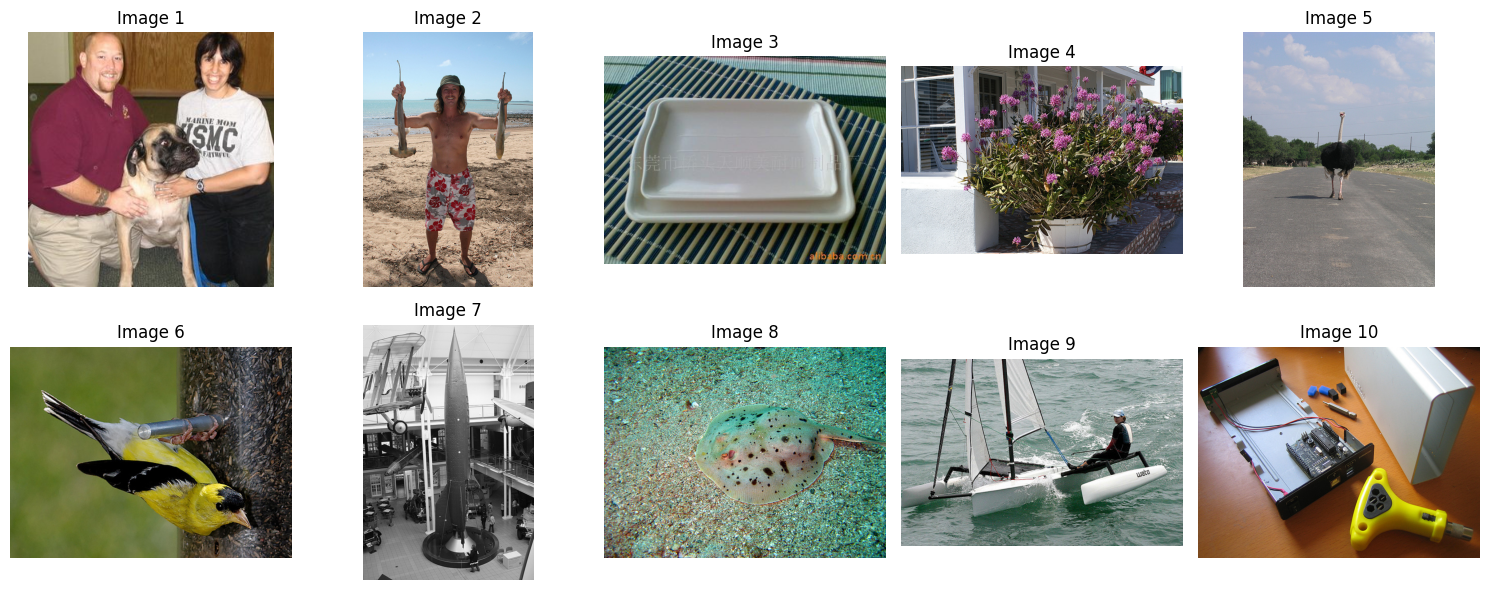

In [47]:
display_images(pictures_10)

# **Task 3: Fetch the EfficientNetB7 Model, Preprocess Method and Decode Method to the Working Environment.**

# **Task 3 Solution**

In [48]:
from keras.applications.efficientnet import EfficientNetB7, preprocess_input as preprocess_inp_efficientnet, decode_predictions as decode_efficientnet

# **Task 4: Write the Preprocess Function (target_size= (600, 600))**

# **Task 4 Solution**

In [49]:
def preprocess_efficientnet(img_path):
    img = image.load_img(img_path, target_size=(600, 600))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_inp_efficientnet(img_array)
    return img_array

# **Task 5: Write the Prediction Function.**

# **Task 5 Solution**

In [50]:
def predict_efficientnet(model, img_array):
    predictions = model.predict(img_array, verbose=0)
    top_predictions = decode_efficientnet(predictions, top=1)[0][0]
    label, probability = top_predictions[1], top_predictions[2]
    return label, probability

# **Task 6: Write the Function to Visualize the Predictions.**

# **Task 6 Solution**

In [51]:
def visualise_preds_efficientnet(model, image_paths, visualize=False):
    results = {}
    for img_path in image_paths:
        img_array = preprocess_efficientnet(img_path)
        label, probability = predict_efficientnet(model, img_array)
        results[img_path] = (label, probability)
        if visualize:
            plt.figure(figsize=(8, 8))
            plt.imshow(image.load_img(img_path))
            plt.title(f"Predicted: {label} ({probability:.2f}%)")
            plt.axis('off')
            plt.show()

    return results

# **Task 7: Call the EfficientNetB7 Model.**

# **Task 7 Solution**

In [52]:
efficientnet_model = EfficientNetB7(weights='imagenet')

# **Task 8: Obtain Predictions for the Images in the Directory by Visualizing Them.**

# **Task 8 Solution**

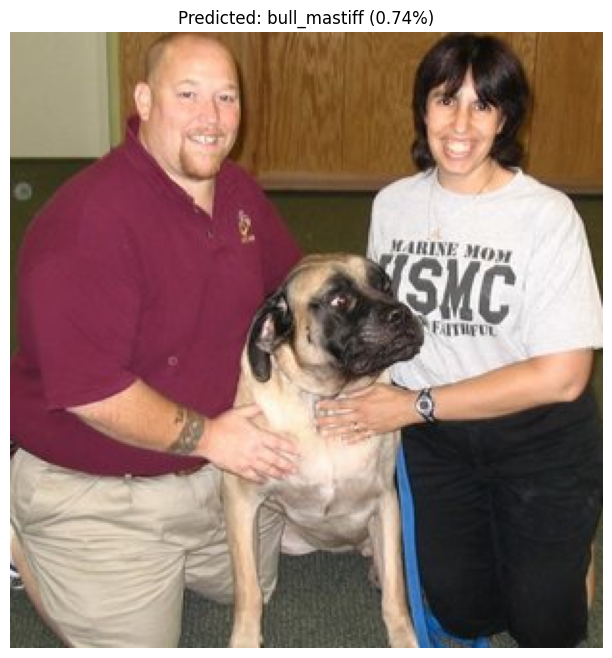

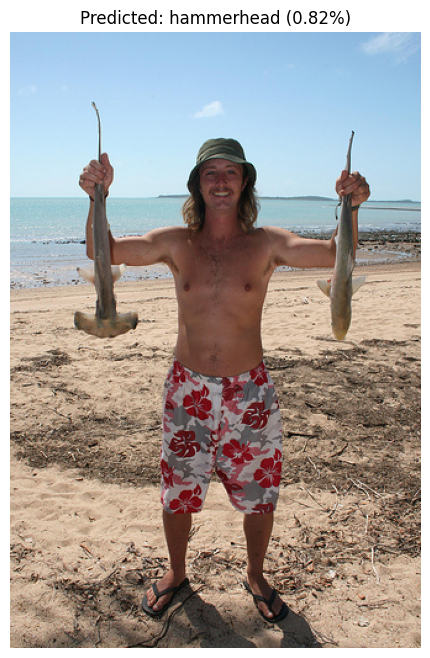

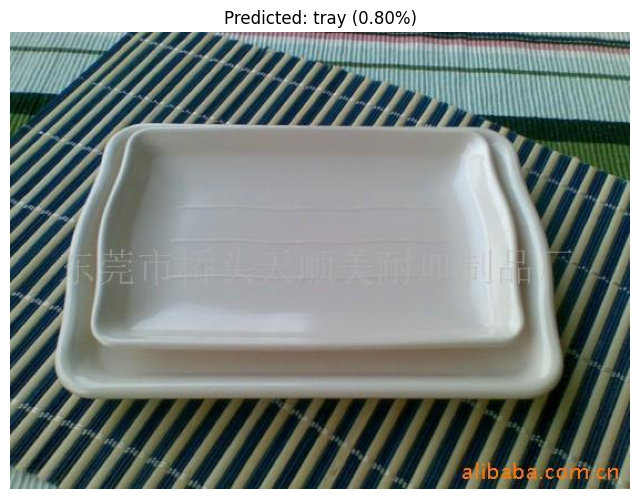

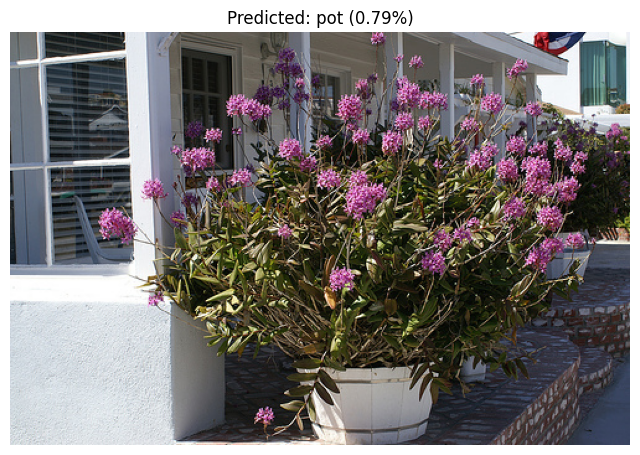

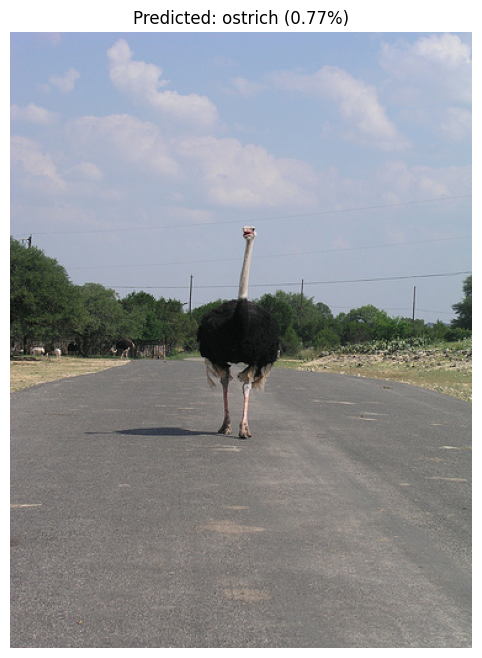

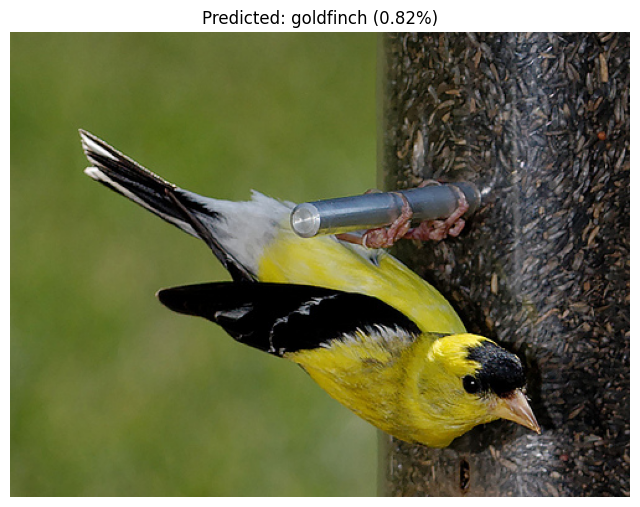

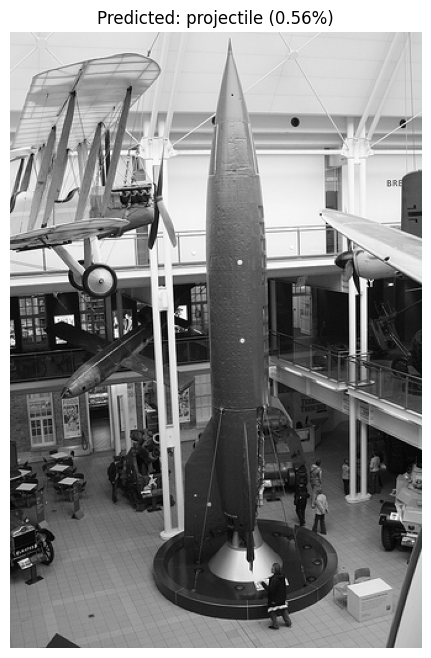

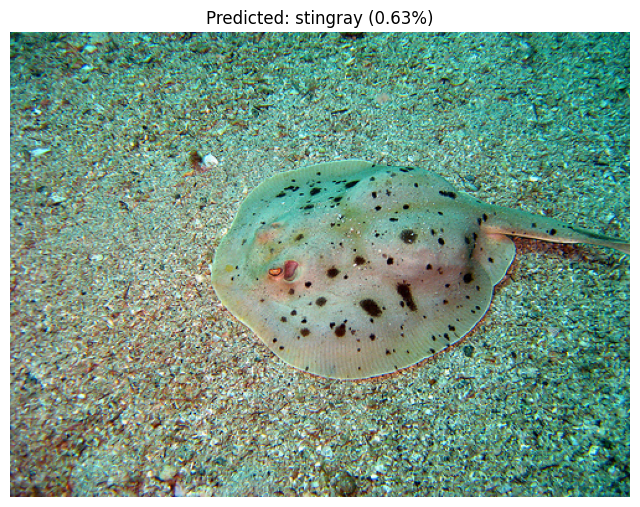

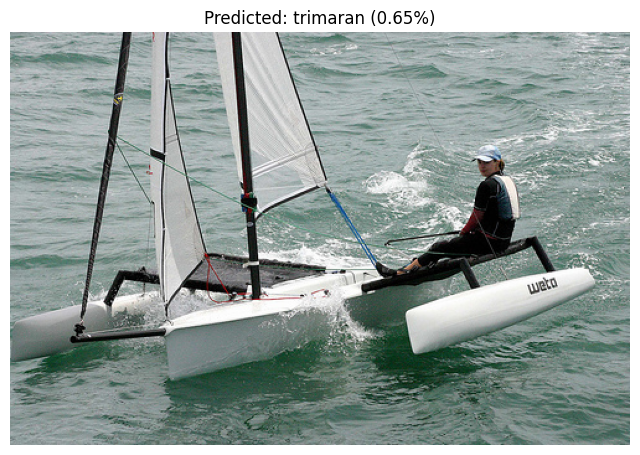

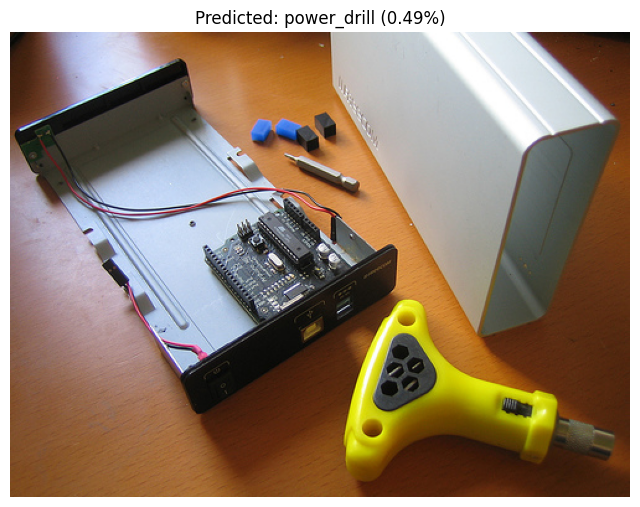

In [53]:
predicted_classes = visualise_preds_efficientnet(efficientnet_model, pictures_10, True)